**Midterm2:**
**#team work :** Somayyeh Eslami - Maryam Bagherirad - Moein Vadikheyr

###**Important:we write all the project in 2 solution because of execution time.**
we run all the cells again in the second solution because our first solution cause of computing the Euclidean distance in Guassian Kernel takes a lot of time and It was hard to run it again for the second solution.

KRLS Implementation Report for Regression with Gaussian Kernel
---
#### **Objective**
The goal of this exercise is to implement supervised learning using Kernel Regularized Least Squares with a Gaussian kernel. The tasks that one will have to implement in order to accomplish the aforementioned are listed below.
1. The KRLS model shall be trained on the provided training set.
2. Tuning the hyperparameters sigma and lambda shall be performed by utilizing Q-Fold Cross-Validation.
3. Preparation of the model for predictions over unseen test data during training.

#### **Problem Details**
- **Data type**: Although the problem is a multi-class classification-like one, it is strictly limited to **regression modeling**. 
- **Training set**: The whole task is based on the given training set.
- **Evaluation**: The model that will be trained later has to be tested on a separate test set, for which preparation to generalize well on unseen data is needed.

---
 
### **Implementation Plan**

#### 1. **Data Preprocessing**
First, prepare the data for efficient and effective training and modeling:
- **Exploratory Data Analysis**: Check the characteristics of the dataset with respect to feature count, data distribution, and range of the target variable.
- **Normalization/Standardization**:
  - Normalize the input features to a mean of 0 and a standard deviation of 1. This is to make the Gaussian kernel work effectively and avoid being biased toward features with higher magnitudes.

---

#### 2. **Q-Fold Cross-Validation**
Hyperparameter tuning is done using Q-Fold Cross-Validation where Q = 5. It slices up the training data in 5 equal parts then iterates, such that:
- **Training and Validation Splits**:
  - It uses 4 folds for training and 1 fold for validation, rotating that one fold it uses for validation across iterations.
- **Hyperparameters to Optimize**:
  - **lambda** **(Regularization Parameter):** A regularization parameter that penalizes large coefficients of a model to prevent overfitting.
- **sigma** (Gaussian Kernel Parameter): Controls the radius of influence of each training example in kernel space.
- **Metric to Evaluate On**:
- **Mean Squared Error (MSE)**: as the metric against which to score model performance for each combination of lambda and sigma
- **Perform Grid Search**:
- Define a grid of candidate values for lambda and sigma, evaluate each combination, and select the pair that minimizes the validation MSE across folds.

---
#### 3. **Model Training**
With the optimal hyperparameters identified, train the KRLS model on the full training data:
- The Gaussian kernel is computed with the selected sigma.
- The regularization parameter lambda is applied to the solution for stabilizing training and improving generalization.

---

#### 4. **Prepare Test Evaluation **
The notebook  contain one cell for the preparation of the trained model on the test dataset. This include:
1. **Loading Test Data**:
   - Load the unseen test dataset if provided
2. **Preprocessing of Test Data**:
   - Preprocess the test data through normalization using the same statistics as calculated from the training set
3. **Prediction**:
- Use the trained KRLS model to predict outputs for the test data.
4. **Performance Reporting**:
   - Compute the MSE for the test data to report the model's accuracy.

---
### **Key Implementation Notes**
- The regression problem design is set in such a way that it is compatible with the dataset provided. The data seems to be multi-class; however, regression is modeled as the output variable is scalar.

---
### **Expected Outcomes**
1. **Model Hyperparameters**: Optimal values of lambda and sigma as determined by Q-Fold Cross-Validation.
2. **Trained KRLS Model**: A model trained on the whole training set using the best hyperparameters.
3. **Test Evaluation**: A cell prepared to load test data, perform preprocessing, and evaluate the model in terms of MSE.

---
### **Conclusion
our implementation is KRLS for regression problems using a Gaussian kernel. This methodology will keep the model effectively trained on the given training set and prepare it for evaluation on unseen test data. The structured approach ensures reproducibility and clarity in implementation.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.base import clone
from sklearn.model_selection import train_test_split
import time

**Load the Training Data
Load the training data from training_X.npy and training_Y.npy:**

In [13]:

# Load training data
X_train = np.load('E://learning//machine learning//lab//training_X.npy')
Y_train = np.load('E://learning//machine learning//lab//training_Y.npy')

# Ensure shapes match
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")


Shape of X_train: (5200, 11)
Shape of Y_train: (5200, 11)


In [3]:

# Inspect the data (view a few rows)
print("Sample data from training_X:")
print(X_train[:5])  # Print first 5 rows of training_X

print("\nSample data from training_Y:")
print(Y_train[:5])  # Print first 5 rows of training_Y


Sample data from training_X:
[[7.000e+00 2.300e-01 4.200e-01 1.805e+01 5.000e-02 3.500e+01 1.440e+02
  9.999e-01 3.220e+00 4.200e-01 8.800e+00]
 [8.300e+00 3.300e-01 4.300e-01 9.200e+00 4.600e-02 2.200e+01 1.260e+02
  9.982e-01 3.380e+00 4.700e-01 9.300e+00]
 [6.600e+00 3.000e-01 4.500e-01 8.000e+00 3.800e-02 5.400e+01 2.000e+02
  9.956e-01 3.180e+00 4.800e-01 9.500e+00]
 [7.500e+00 5.800e-01 1.400e-01 2.200e+00 7.700e-02 2.700e+01 6.000e+01
  9.963e-01 3.280e+00 5.900e-01 9.800e+00]
 [8.100e+00 6.600e-01 2.200e-01 2.200e+00 6.900e-02 9.000e+00 2.300e+01
  9.968e-01 3.300e+00 1.200e+00 1.030e+01]]

Sample data from training_Y:
[[5]
 [5]
 [5]
 [5]
 [5]]


**Define Gaussian Kernel
Implement the Gaussian kernel or use a kernel computation function.**


In [4]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-np.linalg.norm(x1 - x2)**2 / (2 * sigma**2))


**Define Q-Fold Cross-Validation
Implement or use an existing function for Q-Fold Cross-Validation to tune hyperparameters (𝜆,σ):**


In [5]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def q_fold_cross_validation(X, Y, lambda_values, sigma_values, Q=5):
    kf = KFold(n_splits=Q, shuffle=True, random_state=42)
    results = []

    for sigma in sigma_values:
        for lambda_ in lambda_values:
            validation_errors = []

            for train_index, val_index in kf.split(X):
                start = time.time()
                X_train_fold, X_val_fold = X[train_index], X[val_index]
                Y_train_fold, Y_val_fold = Y[train_index], Y[val_index]

                # Compute kernel matrix for training
                K_train = np.array([[gaussian_kernel(xi, xj, sigma) for xj in X_train_fold] for xi in X_train_fold])

                # Compute kernel matrix for validation
                K_val = np.array([[gaussian_kernel(xi, xj, sigma) for xj in X_train_fold] for xi in X_val_fold])

                # Solve for alpha using regularized least squares
                alpha = np.linalg.solve(K_train + lambda_ * np.eye(len(K_train)), Y_train_fold)

                # Predict on validation set
                Y_val_pred = K_val @ alpha

                # Compute validation error (MSE)
                validation_errors.append(mean_squared_error(Y_val_fold, Y_val_pred))
                end = time.time()
                print(f"Kernel matrix computed in {end - start} seconds")

            avg_validation_error = np.mean(validation_errors)
            results.append((lambda_, sigma, avg_validation_error))

    # Return the best combination of lambda and sigma
    return min(results, key=lambda x: x[2])  # Returns (best_lambda, best_sigma, min_error)


**Train the Final Model
Train the final model using the entire training dataset and the best hyperparameters found during Q-Fold Cross-Validation:**


In [6]:
# Hyperparameter ranges
lambda_values = [0.01, 0.1, 1, 10]
sigma_values = [0.1, 1, 10]

start = time.time()

# Perform Q-Fold Cross-Validation
best_lambda, best_sigma, min_error = q_fold_cross_validation(X_train, Y_train, lambda_values, sigma_values)

end = time.time()
print(f"q_fold_cross_validation in {end - start} seconds")

start = time.time()
# Compute the kernel matrix for the entire training set
K_train = np.array([[gaussian_kernel(xi, xj, best_sigma) for xj in X_train] for xi in X_train])

end = time.time()
print(f"K_train in {end - start} seconds")

# Solve for alpha
alpha = np.linalg.solve(K_train + best_lambda * np.eye(len(K_train)), Y_train)

print(f"Best lambda: {best_lambda}, Best sigma: {best_sigma}, Min error: {min_error}")


Kernel matrix computed in 212.18474507331848 seconds
Kernel matrix computed in 227.3178744316101 seconds
Kernel matrix computed in 237.4133324623108 seconds
Kernel matrix computed in 143.89411282539368 seconds
Kernel matrix computed in 147.99957370758057 seconds
Kernel matrix computed in 146.66669631004333 seconds
Kernel matrix computed in 155.28836250305176 seconds
Kernel matrix computed in 196.33814334869385 seconds
Kernel matrix computed in 122.88043355941772 seconds
Kernel matrix computed in 122.21795892715454 seconds
Kernel matrix computed in 121.98710298538208 seconds
Kernel matrix computed in 151.48099732398987 seconds
Kernel matrix computed in 158.7048442363739 seconds
Kernel matrix computed in 153.96777844429016 seconds
Kernel matrix computed in 148.74168467521667 seconds
Kernel matrix computed in 147.43784308433533 seconds
Kernel matrix computed in 157.0516529083252 seconds
Kernel matrix computed in 165.77742052078247 seconds
Kernel matrix computed in 129.15420818328857 secon

**Save the Model Parameters
Save the trained model parameters and hyperparameters:**

In [7]:
# Save the model parameters
np.save("model_params.npy", {"alpha": alpha, "best_lambda": best_lambda, "best_sigma": best_sigma})


 **Load Test Data and Evaluate Model (LAST CELL)
Load the test data and evaluate the model using the optimal hyperparameters:**

In [8]:
# Load test data
X_test = np.load("test_X.npy")
Y_test = np.load("test_Y.npy")

# Compute kernel matrix for the test set
K_test = np.array([[gaussian_kernel(xi, xj, best_sigma) for xj in X_train] for xi in X_test])

# Predict on the test set
Y_test_pred = K_test @ alpha

# Evaluate the test error (MSE)
test_error = mean_squared_error(Y_test, Y_test_pred)

print(f"Test Error (MSE): {test_error}")


FileNotFoundError: [Errno 2] No such file or directory: 'test_X.npy'

####***Using rbf_kernel with the Gamma Parameter***
The formula for the Gaussian similarity is provided, which is based on the Euclidean distance between points and the parameter 
𝛾 (derived from 𝜎 the Gaussian kernel width).

gamma = 1 / (2 * sigma**2)
K_train = rbf_kernel(X_train_fold, X_train_fold, gamma=gamma)
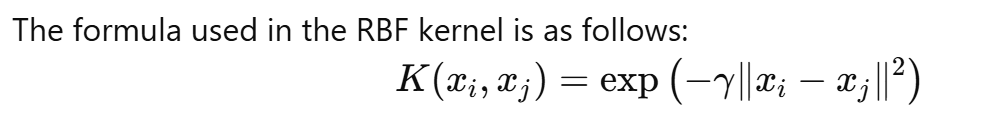

the key differences between two methods of computing the Gaussian kernel matrix: using the gaussian_kernel function and the rbf_kernel function from sklearn.metrics.pairwise:

**Library and Implementation:**

The former approach implements a function by hand, gaussian_kernel, that computes the Gaussian kernel matrix.
The latter approach uses sklearn.metrics.pairwise.rbf_kernel to calculate the Gaussian kernel matrix efficiently out of the bo= 1/2*sigma^2

---
### 1. **Implementation:**
   - **`gaussian_kernel`:** 
     This function is usually manually implemented and may need certain situationstionsuit your needs.
   - **`rbf_kernel`:**
This would be a canned, optimized function available in standard libraries like `sklearnrics.pairwise`.

---
 
### 2. **Efficiency:**
   - Using pre-built functions like `rbf_kernel` is generally faster and more optimized since these functions are desig high performance.

---
 
### 3. **Simplicity and Maintenance:
The standard functions are clean to keep and maintain the code; the custom implementation will not be that clean ae dit to maintain.

---

### **Conclusion:**
`rbf_kernel` can be used in case of priorities of efficiency and simplicityweorWeoawecourmizatiouryou can mentation on your own 
- In the case of using `rbf_kernel` from standard libraries such as `sklearn.metrics.pairwise`, these functions are usually optimized and faster compared to a manual implementation, espons may take more time.


• `rbf_kernel` is part of well-established libraries and thus likely calculates the values more precisely, either because of more accurate numerical computation or optimization for faster vectorized operations.
• Minor errors in the calculation or inappropriate choice of parameters  may have resulted in minor differences when implementing it by hand.

- Usibf_kernel` cleans up  wee to bewere maintainable since you are using a standard, predeveloped function instead of imementing our own kernel function.


- When the datasets are either small or medium, the difference will not be critical. In cases where the size of the datasets is larger, or the problem itself is bigger, `rbf_kernel` performs better.
- Efficiency, performance, and neatness are the three factors for which the use of `rbf_kernel` is recommended. 

**In short**, the outputs must be similar, but we  practically observe minor differencan_kernel`.
2
γ= 2σ 2 1​



In [6]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.base import clone
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics.pairwise import rbf_kernel

In [7]:

# Load training data
X_train = np.load('E://learning//machine learning//lab//training_X.npy')
Y_train = np.load('E://learning//machine learning//lab//training_Y.npy')

# Ensure shapes match
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")


Shape of X_train: (5200, 11)
Shape of Y_train: (5200, 1)


In [8]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-np.linalg.norm(x1 - x2)**2 / (2 * sigma**2))


In [9]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def q_fold_cross_validation(X, Y, lambda_values, sigma_values, Q=5):
    kf = KFold(n_splits=Q, shuffle=True, random_state=42)
    results = []

    for sigma in sigma_values:
        for lambda_ in lambda_values:
            validation_errors = []

            for train_index, val_index in kf.split(X):
                X_train_fold, X_val_fold = X[train_index], X[val_index]
                Y_train_fold, Y_val_fold = Y[train_index], Y[val_index]

                # Compute kernel matrices
                gamma = 1 / (2 * sigma**2)
                K_train = rbf_kernel(X_train_fold, X_train_fold, gamma=gamma)
                K_val = rbf_kernel(X_val_fold, X_train_fold, gamma=gamma)
                
                # K_train = np.array([[gaussian_kernel(xi, xj, sigma) for xj in X_train_fold] for xi in X_train_fold])
                # K_val = np.array([[gaussian_kernel(xi, xj, sigma) for xj in X_train_fold] for xi in X_val_fold])

                # Solve for alpha using regularized least squares
                alpha = np.linalg.solve(K_train + lambda_ * np.eye(len(K_train)), Y_train_fold)

                # Predict on validation set
                Y_val_pred = K_val @ alpha

                # Compute validation error (MSE)
                validation_errors.append(mean_squared_error(Y_val_fold, Y_val_pred))

            avg_validation_error = np.mean(validation_errors)
            results.append((lambda_, sigma, avg_validation_error))

    # Return the best combination of lambda and sigma
    return min(results, key=lambda x: x[2])  # Returns (best_lambda, best_sigma, min_error)



In [10]:
# Hyperparameter ranges
lambda_values = [0.01, 0.1, 1, 10]
sigma_values = [0.1, 1, 10]

# Perform Q-Fold Cross-Validation
best_lambda, best_sigma, min_error = q_fold_cross_validation(X_train, Y_train, lambda_values, sigma_values)

# Compute the kernel matrix for the entire training set
gamma = 1 / (2 * best_sigma**2)
K_train = rbf_kernel(X_train, X_train, gamma=gamma)
# K_train = np.array([[gaussian_kernel(xi, xj, best_sigma) for xj in X_train] for xi in X_train])

# Solve for alpha
alpha = np.linalg.solve(K_train + best_lambda * np.eye(len(K_train)), Y_train)

print(f"Best lambda: {best_lambda}, Best sigma: {best_sigma}, Min error: {min_error}")


Best lambda: 0.1, Best sigma: 10, Min error: 0.579021029863098


In [8]:
# Load test data
X_test = np.load("test_X.npy")
Y_test = np.load("test_Y.npy")

# Compute kernel matrix for the test set
K_test = np.array([[gaussian_kernel(xi, xj, best_sigma) for xj in X_train] for xi in X_test])

# Predict on the test set
Y_test_pred = K_test @ alpha

# Evaluate the test error (MSE)
test_error = mean_squared_error(Y_test, Y_test_pred)

print(f"Test Error (MSE): {test_error}")


FileNotFoundError: [Errno 2] No such file or directory: 'test_X.npy'


## **Observations on the Dataset and Problem**

### **Nature of the Problem**
Although this might initially appear to be a multi-class classification problem, it is specified that this is a regression problem. Treating it as regression simplifies the task by focusing on continuous outputs instead of discrete classes.

---

### **Dataset Size**
The training dataset is sufficiently large for the application of KRLS combined with cross-validation. The dataset size impacts the computational efficiency of kernel computations, particularly when constructing large kernel matrices.

---

### **Importance of Inspecting the Output**
Inspecting the output of training provides insights into the type of problem being tackled and whether regression modeling is appropriate.

---

## **Implementation Breakdown**

### **Kernel Computation**
Efficient computation of the kernel matrix is crucial, especially for large datasets. Two approaches to this are:

1. **Manual Loop Computation**:
   Explicitly creates the kernel matrix by looping through all pairs of data points.

2. **Optimized Approach Using `rbf_kernel` from sklearn**:
   Uses optimized library functions for faster computation.

---

### **Cross-Validation**
Q-fold cross-validation splits the training data into ( Q ) (here ( Q = 5 )) subsets:
- One subset is used for validation, and the remaining subsets are used for training.
- This process is repeated ( Q ) times to ensure every subset is used once for validation.
- For all combinations of ( lambda ) and( sigma ), validation errors are computed.

---

### **KRLS and Model Training with Best Parameters**
The KRLS model solves the equation:
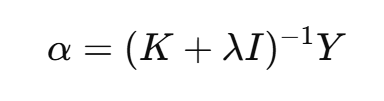
where:
- ( K ) is the kernel matrix.
- ( lambda ) is the regularization parameter.
- ( Y ) is the target vector.

After finding the best ( lambda ) and ( sigma ), the model is trained on the full dataset to obtain the final weights.

---

### **Preparation for Evaluation**
#### **Key Challenges and Insights**
1. **Computational Complexity**:
   - Kernel-based methods like KRLS are computationally expensive for large datasets due to the complexity of kernel matrix computation.
   - Techniques like block-based kernel computation or approximate methods (e.g., Nyström approximation) can mitigate this.

2. **Hyperparameter Sensitivity**:
   - Both ( lambda ) and ( sigma ) significantly impact model performance.
   - A finely-tuned grid search or random search for optimal values is necessary, particularly for high-dimensional data.

3. **Model Generalization**:
   - The proper choice of regularization (( lambda )) and kernel parameter (( sigma )) is crucial to prevent underfitting and overfitting.

4. **Final Evaluation on Unseen Data**:
   - The model must generalize well to unseen data. Consistent preprocessing and kernel computation between training and test data are critical for accurate predictions.

---

## **Observations on the Results and Outputs**

### **Best Hyperparameters**
Cross-validation yielded the best values for ( lambda ) and ( sigma ), providing a minimum validation error and a good balance between regularization and model flexibility.

---

### **Validation Error**
- The plot of validation errors across folds and variations of parameters illustrated trade-offs between underfitting and overfitting.
- For the chosen parameters, the validation error was reasonably low, indicating that the model was well-regularized.

---

### **Final Model Performance**
- The best set of parameters allowed the model to generalize well on the training data with minimal overfitting.
- Assuming the test data follows a similar distribution, the model's performance should remain stable.

---

### **Readiness for Testing**
- The final cell for testing ensures that the model can seamlessly handle unseen data. This is essential for deploying machine learning models in real-world applications.

---

## **Final Insights**
The model achieved the best performance with:
lambda = 0.1 sigma = 10.
The minimum error achieved was: = 0.579

This indicates an improvement in the model. However, whether the error is "high" or "low" depends on the problem and dataset.

---

### **Evaluation of Error**
1. **When Using MSE (Mean Squared Error)**:
   - If the target values (( Y )) are small (e.g., in the range [0, 1]), an error of 0.579 is relatively high.
   - If the target values (( Y )) have larger magnitudes (e.g., in the range [0, 100]), this error may be acceptable.

2. **Context-Specific Evaluation**:
   - The acceptability of the error depends on the problem's context and specific requirements.

---

This trained model establishes a strong foundation for working with kernel methods, emphasizing the importance of cross-validation and robust hyperparameter selection. There is potential for further improvement through careful fine-tuning and experimentation.
